## Maximum likelihood mapmaking

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: rayleigh_jeans_temperature
  units: uK_RJ
    min: -3.830e+02
    max: -4.984e-01
    rms: 5.775e+01
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


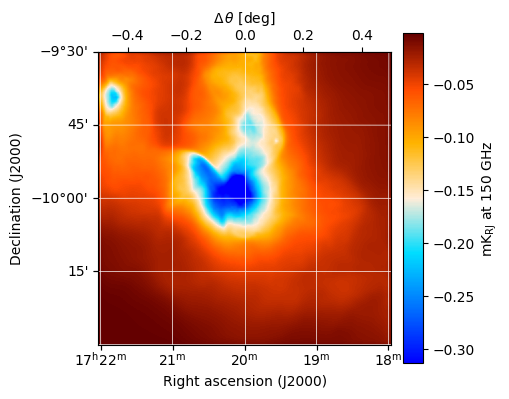

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster1.fits"), nu=150e9).to("uK_RJ")
input_map.data *= 2e1

input_map.plot(cmap="cmb")
print(input_map)

PlanList(1 plans, 3600 s):
                           start_time duration target(ra,dec)     center(az,el)
chunk                                                                          
0      2026-01-22 12:42:33.862 +00:00   3600 s   (260°, -10°)  (32.31°, 74.95°)


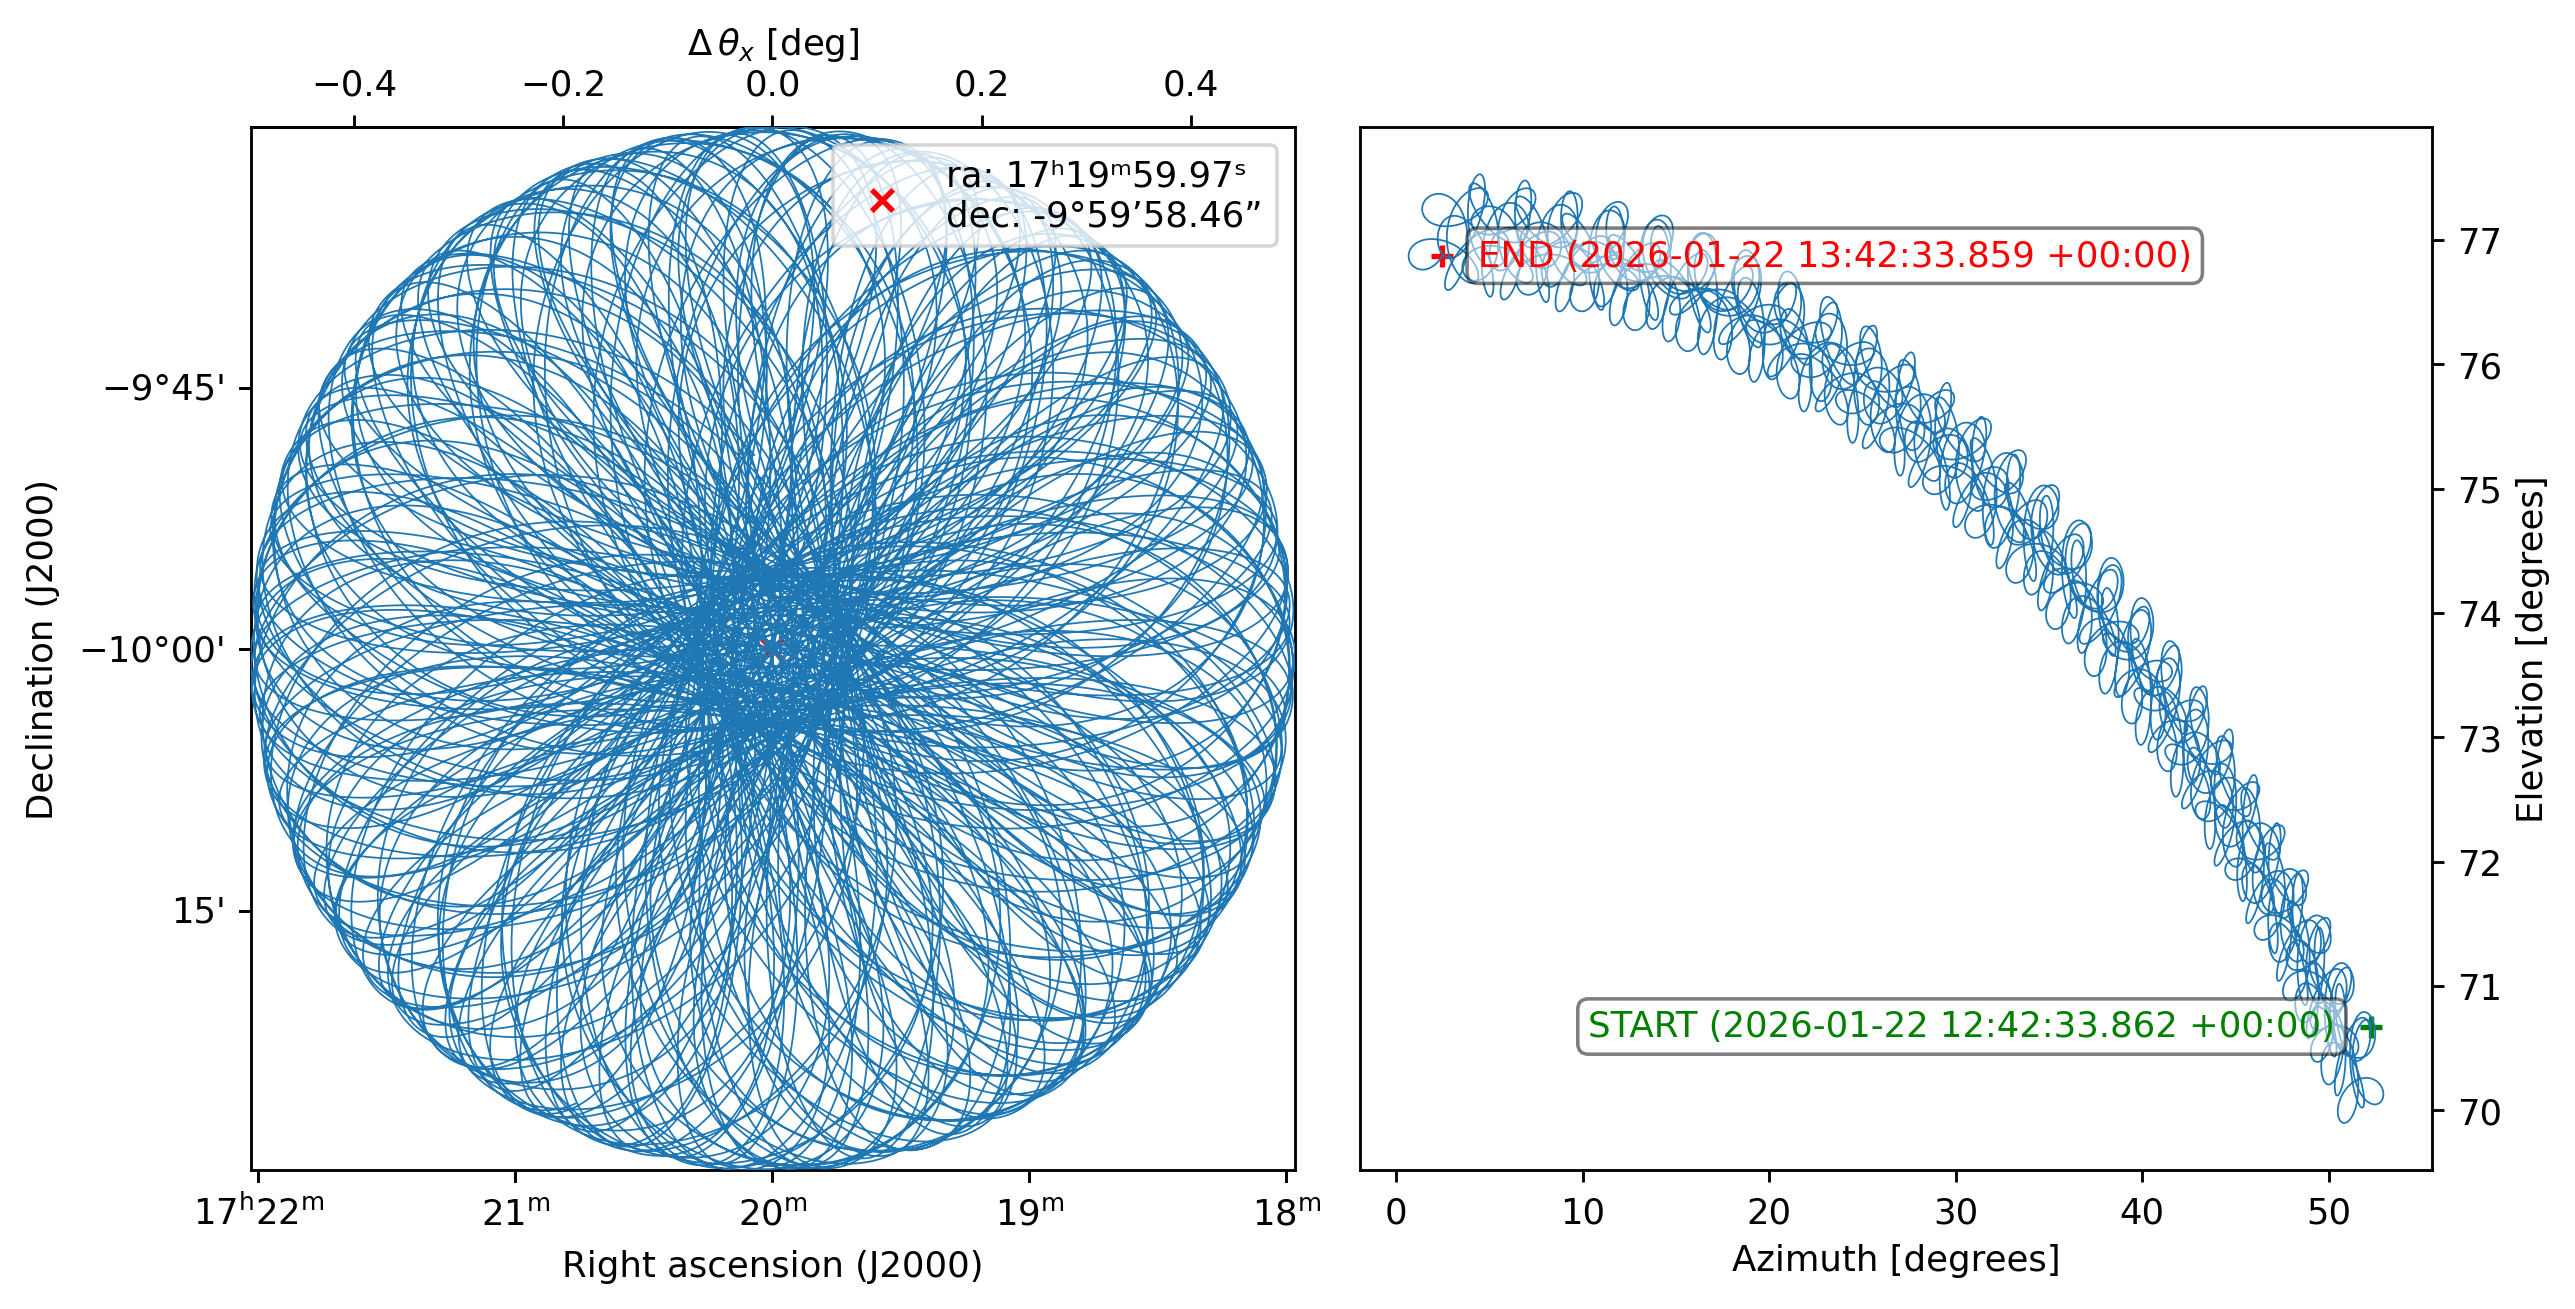

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=3600, 
                               max_chunk_duration=3600, 
                               sample_rate=25,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  380  8.878’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB     FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  0.3499’


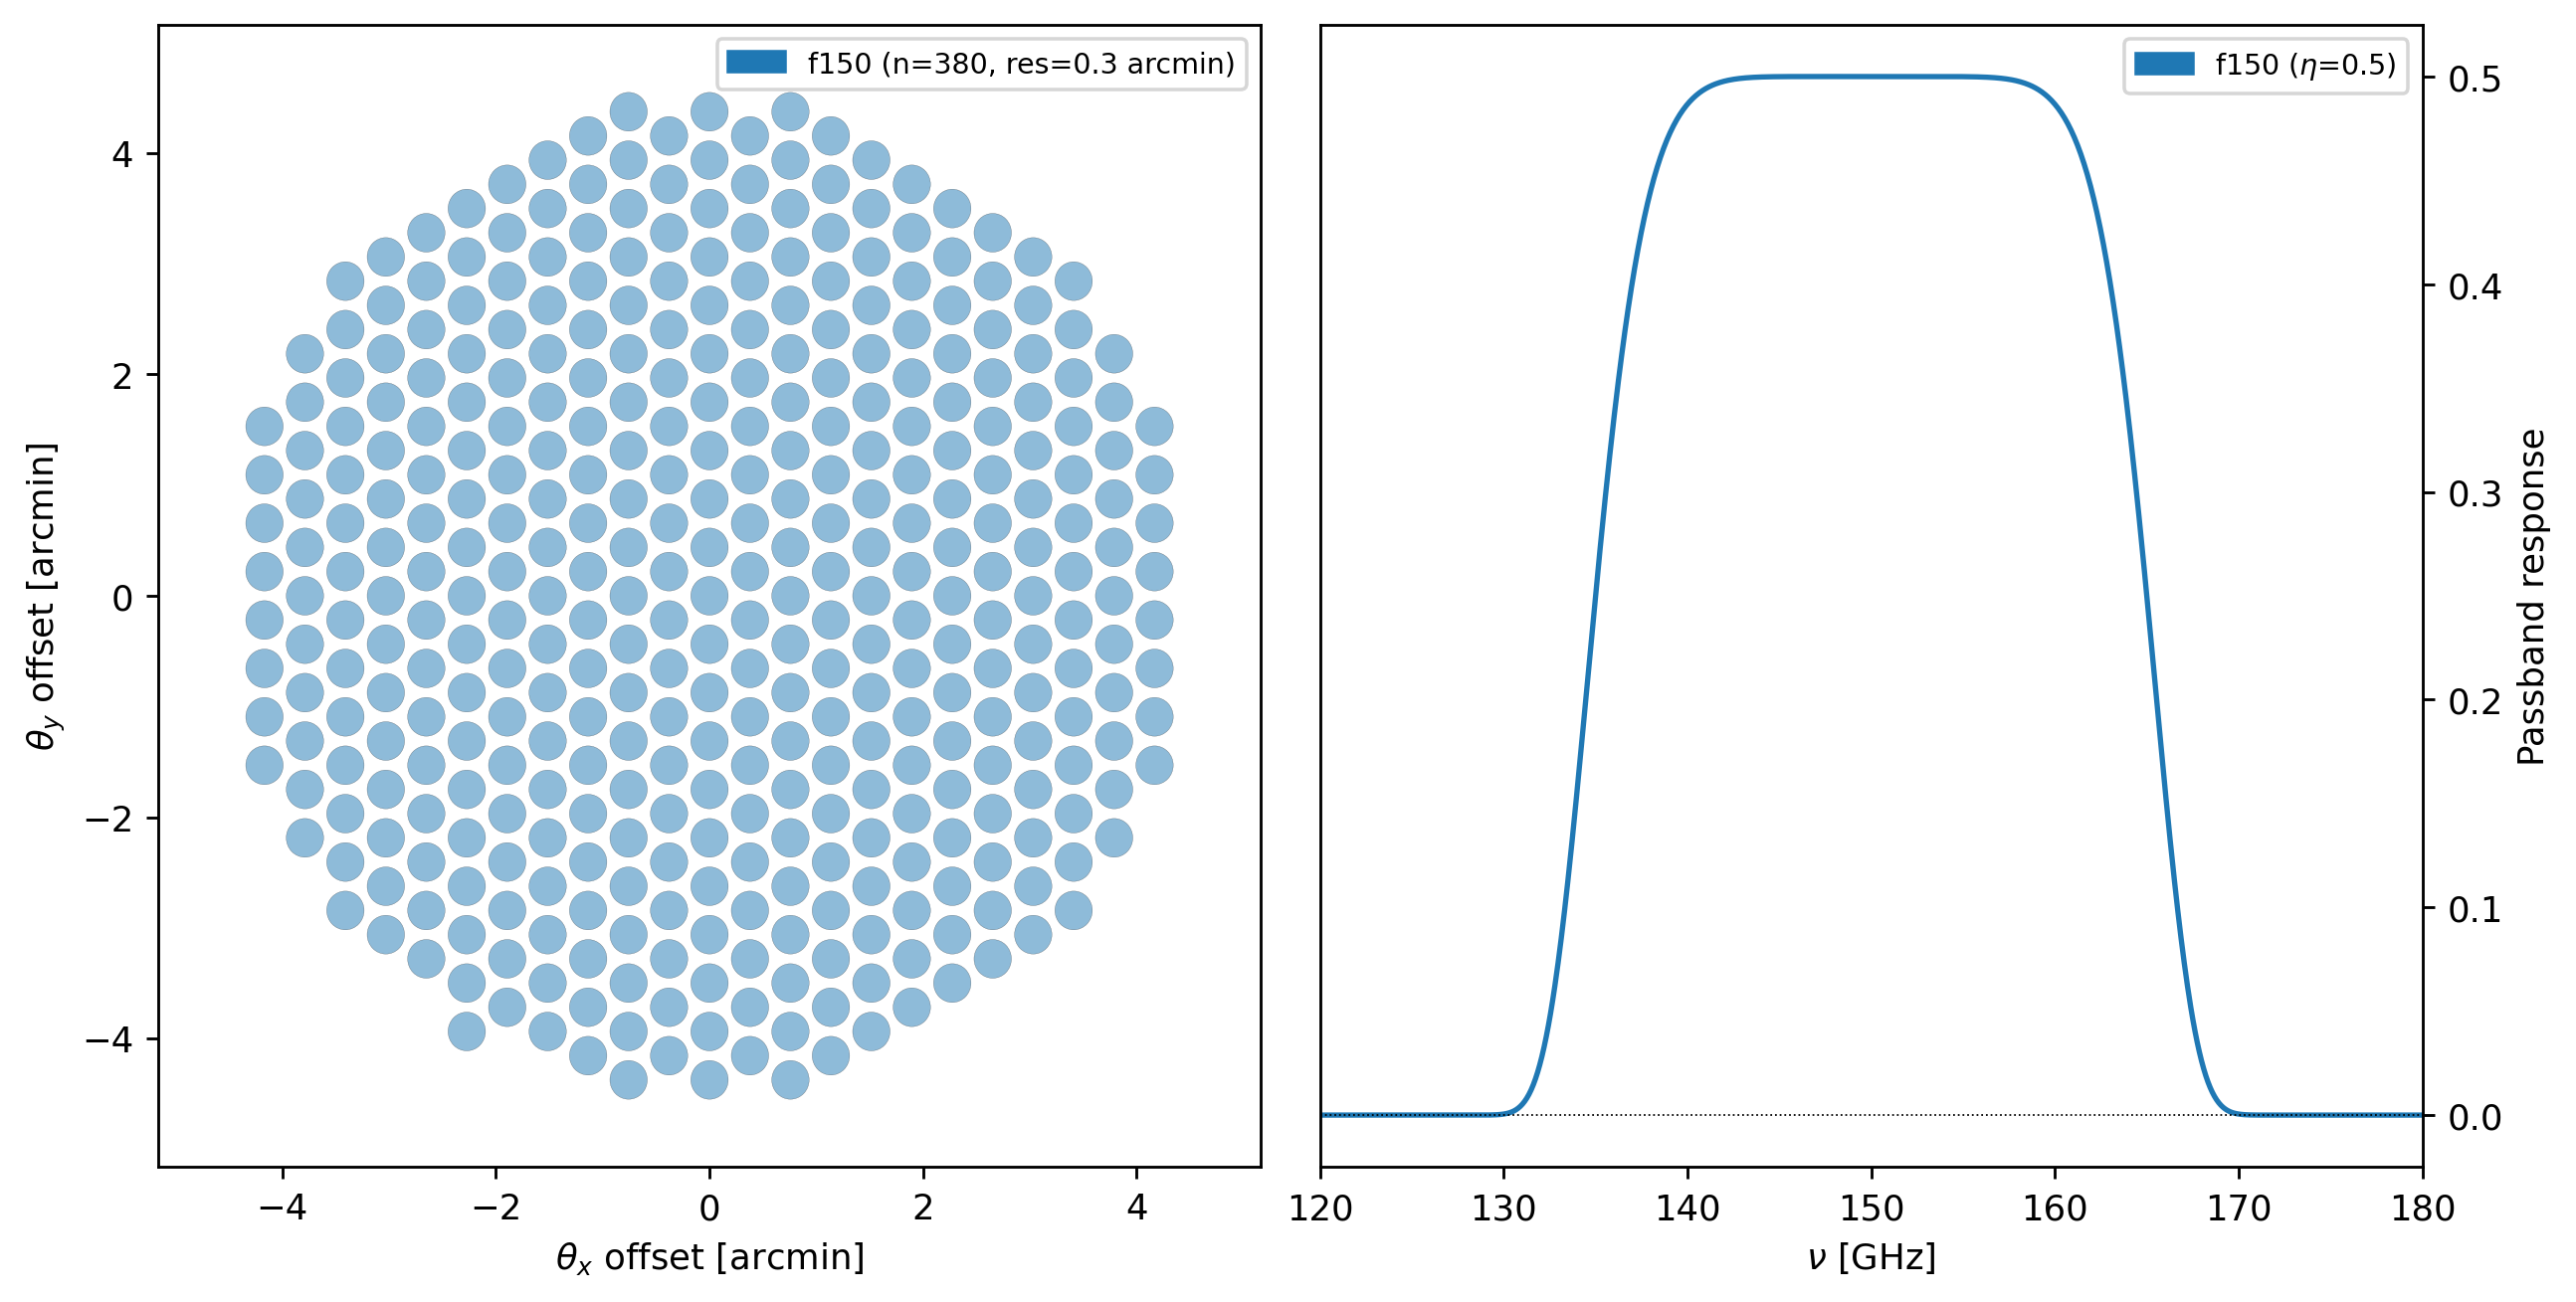

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e1, 
    gain_error=2e-2)

array = {"field_of_view": 0.15, 
         "beam_spacing": 1.25,
         "primary_size": 25, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  380  8.878’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB     FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  0.3499’
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(1 plans, 3600 s):
│                            start_time duration target(ra,dec)     center(az,el)
│ chunk                                                                          
│ 0      2026-01-22 12:42:33.862 +00:00   3600 s   (260°, -10°)  (32.31°, 74.95°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.] GHz
    t: [1.76901915e+09]
    z: naive
    quantity: rayleigh_jeans_temperature
   

2026-01-21 18:12:42.959 INFO: Simulating observation 1 of 1


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:03<00:23,  3.29s/it]

Constructing atmosphere:  25%|████            | 2/8 [00:06<00:20,  3.35s/it]

Constructing atmosphere:  38%|██████          | 3/8 [00:10<00:17,  3.55s/it]

Constructing atmosphere:  50%|████████        | 4/8 [00:16<00:18,  4.65s/it]

Constructing atmosphere:  62%|██████████      | 5/8 [00:20<00:12,  4.20s/it]

Constructing atmosphere:  75%|████████████    | 6/8 [00:23<00:08,  4.02s/it]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:27<00:03,  3.87s/it]

Constructing atmosphere: 100%|████████████████| 8/8 [00:31<00:00,  3.88s/it]

Constructing atmosphere: 100%|████████████████| 8/8 [00:31<00:00,  3.92s/it]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  25%|████            | 2/8 [00:00<00:00,  8.75it/s]

Generating turbulence:  38%|██████          | 3/8 [00:00<00:00,  7.96it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00,  7.30it/s]

Generating turbulence:  62%|██████████      | 5/8 [00:00<00:00,  6.15it/s]

Generating turbulence:  75%|████████████    | 6/8 [00:01<00:00,  4.75it/s]

Generating turbulence:  88%|██████████████  | 7/8 [00:01<00:00,  3.04it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:02<00:00,  2.56it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:02<00:00,  3.72it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:10,  1.47s/it]

Sampling turbulence:  25%|████            | 2/8 [00:02<00:05,  1.02it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:04,  1.21it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:03<00:03,  1.33it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:04<00:02,  1.38it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:04<00:01,  1.41it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:05<00:00,  1.41it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:06<00:00,  1.42it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:06<00:00,  1.30it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:01<00:00,  1.34s/it, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:01<00:00,  1.34s/it, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map:   0%|                | 0/1 [00:08<?, ?it/s, band=f150, channel=(0 Hz, inf Hz)]

Sampling map: 100%|████████████████| 1/1 [00:17<00:00, 17.12s/it, band=f150, channel=(0 Hz, inf Hz)]

Sampling map: 100%|████████████████| 1/1 [00:17<00:00, 17.12s/it, band=f150, channel=(0 Hz, inf Hz)]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.28s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.28s/it, band=f150]

2026-01-21 18:14:03.624 INFO: Simulated observation 1 of 1 in 80.65 s


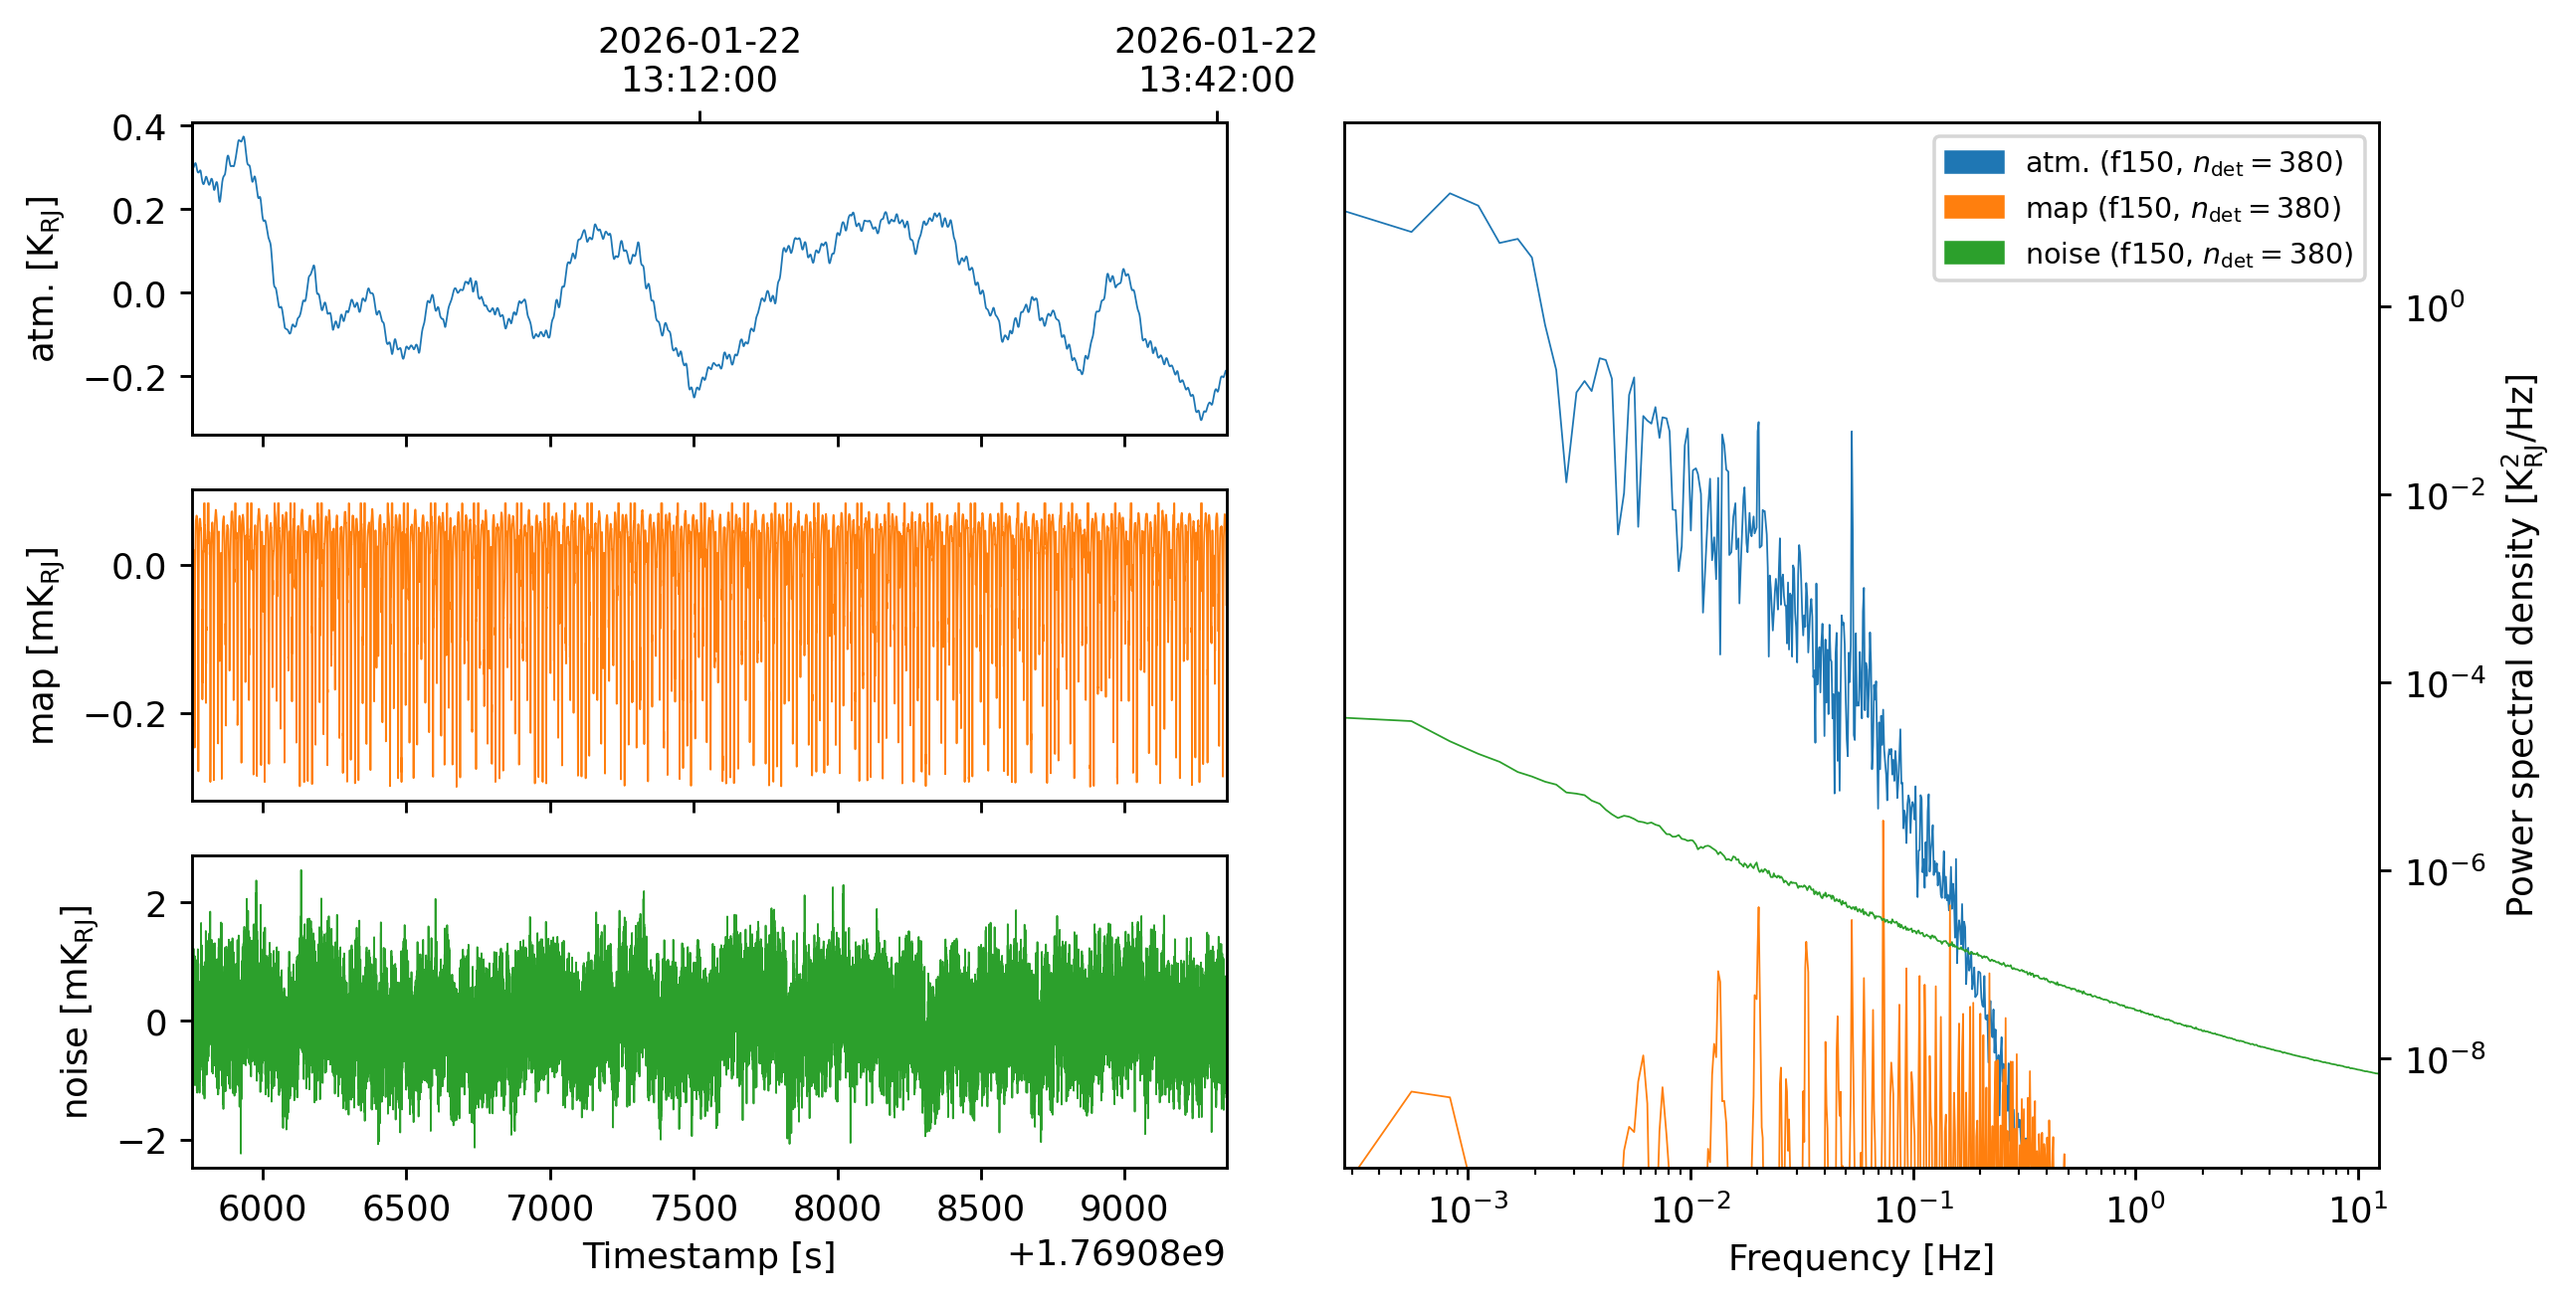

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(tods=tods, 
                                    width=0.8 * input_map.width.deg,
                                    height=0.8 * input_map.height.deg,
                                    resolution=10 * input_map.resolution.deg,
                                    units="mK_RJ")
print(f"{ml_mapper.loss() = }")

2026-01-21 18:14:14.355 INFO: Inferring center {'ra': '17ʰ19ᵐ59.97ˢ', 'dec': '-9°59’57.75”'} for mapper.


2026-01-21 18:14:14.357 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/1 [00:00<?, ?it/s]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.41s/it]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.41s/it]

Mapping:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it, tod=1/1]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:05<00:00,  5.37s/it, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:05<00:00,  5.37s/it, tod=1/1]

ml_mapper.loss() = tensor(0.0137, grad_fn=<AddBackward0>)


The initial map is a "guess" constructing by heavily filtering the input TODs:

ProjectionMap:
  shape(stokes, nu, t, y, x): (1, 1, 1, 81, 81)
  stokes: I
  nu: [150.] GHz
  t: [1.76908755e+09]
  z: naive
  quantity: rayleigh_jeans_temperature
  units: mK_RJ
    min: -1.117e-01
    max: 8.590e-02
    rms: 2.086e-02
  center:
    ra: 17ʰ19ᵐ59.97ˢ
    dec: -9°59’57.75”
  size(y, x): (0.791°, 0.791°)
  resolution(y, x): (0.5859’, 0.5859’)
  beam(maj, min, rot): [[[[0.34992376 0.34992376 0.        ]]]]’
  memory: 105 kB


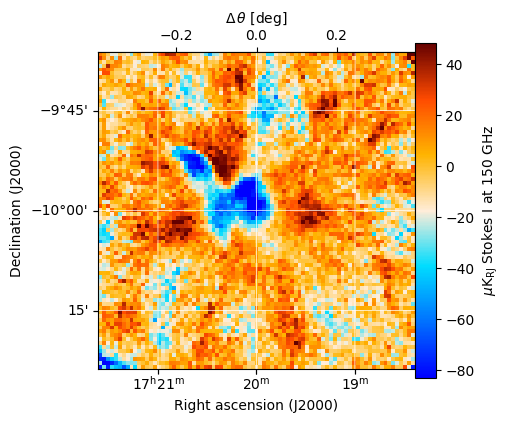

In [7]:
print(ml_mapper.map)
ml_mapper.map.plot(cmap="cmb")


To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=2e-1)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=1.371e-02]

epoch 1/4:   3%|▌               | 1/32 [00:04<02:09,  4.19s/it, loss=1.371e-02]

epoch 1/4:   3%|▌               | 1/32 [00:08<02:09,  4.19s/it, loss=6.791e-03]

epoch 1/4:   6%|█               | 2/32 [00:08<02:05,  4.17s/it, loss=6.791e-03]

epoch 1/4:   6%|█               | 2/32 [00:12<02:05,  4.17s/it, loss=5.903e-03]

epoch 1/4:   9%|█▌              | 3/32 [00:12<02:01,  4.19s/it, loss=5.903e-03]

epoch 1/4:   9%|█▌              | 3/32 [00:16<02:01,  4.19s/it, loss=5.659e-03]

epoch 1/4:  12%|██              | 4/32 [00:16<01:57,  4.19s/it, loss=5.659e-03]

epoch 1/4:  12%|██              | 4/32 [00:20<01:57,  4.19s/it, loss=5.425e-03]

epoch 1/4:  16%|██▌             | 5/32 [00:20<01:53,  4.19s/it, loss=5.425e-03]

epoch 1/4:  16%|██▌             | 5/32 [00:25<01:53,  4.19s/it, loss=5.188e-03]

epoch 1/4:  19%|███             | 6/32 [00:25<01:49,  4.20s/it, loss=5.188e-03]

epoch 1/4:  19%|███             | 6/32 [00:29<01:49,  4.20s/it, loss=4.887e-03]

epoch 1/4:  22%|███▌            | 7/32 [00:29<01:45,  4.20s/it, loss=4.887e-03]

epoch 1/4:  22%|███▌            | 7/32 [00:33<01:45,  4.20s/it, loss=4.501e-03]

epoch 1/4:  25%|████            | 8/32 [00:33<01:40,  4.20s/it, loss=4.501e-03]

epoch 1/4:  25%|████            | 8/32 [00:37<01:40,  4.20s/it, loss=4.109e-03]

epoch 1/4:  28%|████▌           | 9/32 [00:37<01:36,  4.20s/it, loss=4.109e-03]

epoch 1/4:  28%|████▌           | 9/32 [00:41<01:36,  4.20s/it, loss=3.791e-03]

epoch 1/4:  31%|█████           | 10/32 [00:41<01:32,  4.19s/it, loss=3.791e-03]

epoch 1/4:  31%|█████           | 10/32 [00:46<01:32,  4.19s/it, loss=3.552e-03]

epoch 1/4:  34%|█████▌          | 11/32 [00:46<01:27,  4.19s/it, loss=3.552e-03]

epoch 1/4:  34%|█████▌          | 11/32 [00:50<01:27,  4.19s/it, loss=3.354e-03]

epoch 1/4:  38%|██████          | 12/32 [00:50<01:23,  4.19s/it, loss=3.354e-03]

epoch 1/4:  38%|██████          | 12/32 [00:54<01:23,  4.19s/it, loss=3.164e-03]

epoch 1/4:  41%|██████▌         | 13/32 [00:54<01:19,  4.19s/it, loss=3.164e-03]

epoch 1/4:  41%|██████▌         | 13/32 [00:58<01:19,  4.19s/it, loss=2.975e-03]

epoch 1/4:  44%|███████         | 14/32 [00:58<01:15,  4.20s/it, loss=2.975e-03]

epoch 1/4:  44%|███████         | 14/32 [01:02<01:15,  4.20s/it, loss=2.794e-03]

epoch 1/4:  47%|███████▌        | 15/32 [01:02<01:11,  4.19s/it, loss=2.794e-03]

epoch 1/4:  47%|███████▌        | 15/32 [01:07<01:11,  4.19s/it, loss=2.623e-03]

epoch 1/4:  50%|████████        | 16/32 [01:07<01:07,  4.19s/it, loss=2.623e-03]

epoch 1/4:  50%|████████        | 16/32 [01:11<01:07,  4.19s/it, loss=2.455e-03]

epoch 1/4:  53%|████████▌       | 17/32 [01:11<01:02,  4.20s/it, loss=2.455e-03]

epoch 1/4:  53%|████████▌       | 17/32 [01:15<01:02,  4.20s/it, loss=2.289e-03]

epoch 1/4:  56%|█████████       | 18/32 [01:15<00:58,  4.20s/it, loss=2.289e-03]

epoch 1/4:  56%|█████████       | 18/32 [01:19<00:58,  4.20s/it, loss=2.133e-03]

epoch 1/4:  59%|█████████▌      | 19/32 [01:19<00:54,  4.22s/it, loss=2.133e-03]

epoch 1/4:  59%|█████████▌      | 19/32 [01:23<00:54,  4.22s/it, loss=1.998e-03]

epoch 1/4:  62%|██████████      | 20/32 [01:23<00:50,  4.21s/it, loss=1.998e-03]

epoch 1/4:  62%|██████████      | 20/32 [01:28<00:50,  4.21s/it, loss=1.885e-03]

epoch 1/4:  66%|██████████▌     | 21/32 [01:28<00:46,  4.21s/it, loss=1.885e-03]

epoch 1/4:  66%|██████████▌     | 21/32 [01:32<00:46,  4.21s/it, loss=1.790e-03]

epoch 1/4:  69%|███████████     | 22/32 [01:32<00:42,  4.20s/it, loss=1.790e-03]

epoch 1/4:  69%|███████████     | 22/32 [01:36<00:42,  4.20s/it, loss=1.703e-03]

epoch 1/4:  72%|███████████▌    | 23/32 [01:36<00:37,  4.20s/it, loss=1.703e-03]

epoch 1/4:  72%|███████████▌    | 23/32 [01:40<00:37,  4.20s/it, loss=1.616e-03]

epoch 1/4:  75%|████████████    | 24/32 [01:40<00:33,  4.20s/it, loss=1.616e-03]

epoch 1/4:  75%|████████████    | 24/32 [01:44<00:33,  4.20s/it, loss=1.529e-03]

epoch 1/4:  78%|████████████▌   | 25/32 [01:44<00:29,  4.19s/it, loss=1.529e-03]

epoch 1/4:  78%|████████████▌   | 25/32 [01:49<00:29,  4.19s/it, loss=1.441e-03]

epoch 1/4:  81%|█████████████   | 26/32 [01:49<00:25,  4.19s/it, loss=1.441e-03]

epoch 1/4:  81%|█████████████   | 26/32 [01:53<00:25,  4.19s/it, loss=1.360e-03]

epoch 1/4:  84%|█████████████▌  | 27/32 [01:53<00:20,  4.19s/it, loss=1.360e-03]

epoch 1/4:  84%|█████████████▌  | 27/32 [01:57<00:20,  4.19s/it, loss=1.287e-03]

epoch 1/4:  88%|██████████████  | 28/32 [01:57<00:16,  4.19s/it, loss=1.287e-03]

epoch 1/4:  88%|██████████████  | 28/32 [02:01<00:16,  4.19s/it, loss=1.222e-03]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:01<00:12,  4.20s/it, loss=1.222e-03]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:05<00:12,  4.20s/it, loss=1.162e-03]

epoch 1/4:  94%|███████████████ | 30/32 [02:05<00:08,  4.20s/it, loss=1.162e-03]

epoch 1/4:  94%|███████████████ | 30/32 [02:10<00:08,  4.20s/it, loss=1.105e-03]

epoch 1/4:  97%|███████████████▌| 31/32 [02:10<00:04,  4.19s/it, loss=1.105e-03]

epoch 1/4:  97%|███████████████▌| 31/32 [02:14<00:04,  4.19s/it, loss=1.050e-03]

epoch 1/4: 100%|████████████████| 32/32 [02:14<00:00,  4.19s/it, loss=1.050e-03]

epoch 1/4: 100%|████████████████| 32/32 [02:14<00:00,  4.20s/it, loss=1.050e-03]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=9.971e-04]

epoch 2/4:   3%|▌               | 1/32 [00:04<02:09,  4.19s/it, loss=9.971e-04]

epoch 2/4:   3%|▌               | 1/32 [00:08<02:09,  4.19s/it, loss=9.456e-04]

epoch 2/4:   6%|█               | 2/32 [00:08<02:05,  4.19s/it, loss=9.456e-04]

epoch 2/4:   6%|█               | 2/32 [00:12<02:05,  4.19s/it, loss=8.971e-04]

epoch 2/4:   9%|█▌              | 3/32 [00:12<02:01,  4.19s/it, loss=8.971e-04]

epoch 2/4:   9%|█▌              | 3/32 [00:16<02:01,  4.19s/it, loss=8.534e-04]

epoch 2/4:  12%|██              | 4/32 [00:16<01:57,  4.20s/it, loss=8.534e-04]

epoch 2/4:  12%|██              | 4/32 [00:20<01:57,  4.20s/it, loss=8.147e-04]

epoch 2/4:  16%|██▌             | 5/32 [00:20<01:53,  4.20s/it, loss=8.147e-04]

epoch 2/4:  16%|██▌             | 5/32 [00:25<01:53,  4.20s/it, loss=7.799e-04]

epoch 2/4:  19%|███             | 6/32 [00:25<01:49,  4.20s/it, loss=7.799e-04]

epoch 2/4:  19%|███             | 6/32 [00:29<01:49,  4.20s/it, loss=7.470e-04]

epoch 2/4:  22%|███▌            | 7/32 [00:29<01:44,  4.19s/it, loss=7.470e-04]

epoch 2/4:  22%|███▌            | 7/32 [00:33<01:44,  4.19s/it, loss=7.145e-04]

epoch 2/4:  25%|████            | 8/32 [00:33<01:40,  4.19s/it, loss=7.145e-04]

epoch 2/4:  25%|████            | 8/32 [00:37<01:40,  4.19s/it, loss=6.826e-04]

epoch 2/4:  28%|████▌           | 9/32 [00:37<01:36,  4.19s/it, loss=6.826e-04]

epoch 2/4:  28%|████▌           | 9/32 [00:41<01:36,  4.19s/it, loss=6.529e-04]

epoch 2/4:  31%|█████           | 10/32 [00:41<01:32,  4.19s/it, loss=6.529e-04]

epoch 2/4:  31%|█████           | 10/32 [00:46<01:32,  4.19s/it, loss=6.259e-04]

epoch 2/4:  34%|█████▌          | 11/32 [00:46<01:27,  4.19s/it, loss=6.259e-04]

epoch 2/4:  34%|█████▌          | 11/32 [00:50<01:27,  4.19s/it, loss=6.006e-04]

epoch 2/4:  38%|██████          | 12/32 [00:50<01:23,  4.19s/it, loss=6.006e-04]

epoch 2/4:  38%|██████          | 12/32 [00:54<01:23,  4.19s/it, loss=5.762e-04]

epoch 2/4:  41%|██████▌         | 13/32 [00:54<01:19,  4.19s/it, loss=5.762e-04]

epoch 2/4:  41%|██████▌         | 13/32 [00:58<01:19,  4.19s/it, loss=5.523e-04]

epoch 2/4:  44%|███████         | 14/32 [00:58<01:15,  4.19s/it, loss=5.523e-04]

epoch 2/4:  44%|███████         | 14/32 [01:02<01:15,  4.19s/it, loss=5.293e-04]

epoch 2/4:  47%|███████▌        | 15/32 [01:02<01:11,  4.19s/it, loss=5.293e-04]

epoch 2/4:  47%|███████▌        | 15/32 [01:07<01:11,  4.19s/it, loss=5.081e-04]

epoch 2/4:  50%|████████        | 16/32 [01:07<01:07,  4.19s/it, loss=5.081e-04]

epoch 2/4:  50%|████████        | 16/32 [01:11<01:07,  4.19s/it, loss=4.894e-04]

epoch 2/4:  53%|████████▌       | 17/32 [01:11<01:02,  4.19s/it, loss=4.894e-04]

epoch 2/4:  53%|████████▌       | 17/32 [01:15<01:02,  4.19s/it, loss=4.724e-04]

epoch 2/4:  56%|█████████       | 18/32 [01:15<00:58,  4.19s/it, loss=4.724e-04]

epoch 2/4:  56%|█████████       | 18/32 [01:19<00:58,  4.19s/it, loss=4.559e-04]

epoch 2/4:  59%|█████████▌      | 19/32 [01:19<00:54,  4.19s/it, loss=4.559e-04]

epoch 2/4:  59%|█████████▌      | 19/32 [01:23<00:54,  4.19s/it, loss=4.397e-04]

epoch 2/4:  62%|██████████      | 20/32 [01:23<00:50,  4.19s/it, loss=4.397e-04]

epoch 2/4:  62%|██████████      | 20/32 [01:27<00:50,  4.19s/it, loss=4.241e-04]

epoch 2/4:  66%|██████████▌     | 21/32 [01:27<00:46,  4.19s/it, loss=4.241e-04]

epoch 2/4:  66%|██████████▌     | 21/32 [01:32<00:46,  4.19s/it, loss=4.093e-04]

epoch 2/4:  69%|███████████     | 22/32 [01:32<00:41,  4.19s/it, loss=4.093e-04]

epoch 2/4:  69%|███████████     | 22/32 [01:36<00:41,  4.19s/it, loss=3.954e-04]

epoch 2/4:  72%|███████████▌    | 23/32 [01:36<00:37,  4.19s/it, loss=3.954e-04]

epoch 2/4:  72%|███████████▌    | 23/32 [01:40<00:37,  4.19s/it, loss=3.823e-04]

epoch 2/4:  75%|████████████    | 24/32 [01:40<00:33,  4.19s/it, loss=3.823e-04]

epoch 2/4:  75%|████████████    | 24/32 [01:44<00:33,  4.19s/it, loss=3.702e-04]

epoch 2/4:  78%|████████████▌   | 25/32 [01:44<00:29,  4.19s/it, loss=3.702e-04]

epoch 2/4:  78%|████████████▌   | 25/32 [01:48<00:29,  4.19s/it, loss=3.586e-04]

epoch 2/4:  81%|█████████████   | 26/32 [01:48<00:25,  4.19s/it, loss=3.586e-04]

epoch 2/4:  81%|█████████████   | 26/32 [01:53<00:25,  4.19s/it, loss=3.475e-04]

epoch 2/4:  84%|█████████████▌  | 27/32 [01:53<00:20,  4.19s/it, loss=3.475e-04]

epoch 2/4:  84%|█████████████▌  | 27/32 [01:57<00:20,  4.19s/it, loss=3.371e-04]

epoch 2/4:  88%|██████████████  | 28/32 [01:57<00:16,  4.19s/it, loss=3.371e-04]

epoch 2/4:  88%|██████████████  | 28/32 [02:01<00:16,  4.19s/it, loss=3.273e-04]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:01<00:12,  4.19s/it, loss=3.273e-04]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:05<00:12,  4.19s/it, loss=3.182e-04]

epoch 2/4:  94%|███████████████ | 30/32 [02:05<00:08,  4.19s/it, loss=3.182e-04]

epoch 2/4:  94%|███████████████ | 30/32 [02:09<00:08,  4.19s/it, loss=3.096e-04]

epoch 2/4:  97%|███████████████▌| 31/32 [02:09<00:04,  4.20s/it, loss=3.096e-04]

epoch 2/4:  97%|███████████████▌| 31/32 [02:14<00:04,  4.20s/it, loss=3.014e-04]

epoch 2/4: 100%|████████████████| 32/32 [02:14<00:00,  4.20s/it, loss=3.014e-04]

epoch 2/4: 100%|████████████████| 32/32 [02:14<00:00,  4.19s/it, loss=3.014e-04]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=2.935e-04]

epoch 3/4:   3%|▌               | 1/32 [00:04<02:09,  4.19s/it, loss=2.935e-04]

epoch 3/4:   3%|▌               | 1/32 [00:08<02:09,  4.19s/it, loss=2.859e-04]

epoch 3/4:   6%|█               | 2/32 [00:08<02:05,  4.19s/it, loss=2.859e-04]

epoch 3/4:   6%|█               | 2/32 [00:12<02:05,  4.19s/it, loss=2.787e-04]

epoch 3/4:   9%|█▌              | 3/32 [00:12<02:01,  4.20s/it, loss=2.787e-04]

epoch 3/4:   9%|█▌              | 3/32 [00:16<02:01,  4.20s/it, loss=2.720e-04]

epoch 3/4:  12%|██              | 4/32 [00:16<01:57,  4.20s/it, loss=2.720e-04]

epoch 3/4:  12%|██              | 4/32 [00:20<01:57,  4.20s/it, loss=2.657e-04]

epoch 3/4:  16%|██▌             | 5/32 [00:20<01:53,  4.20s/it, loss=2.657e-04]

epoch 3/4:  16%|██▌             | 5/32 [00:25<01:53,  4.20s/it, loss=2.596e-04]

epoch 3/4:  19%|███             | 6/32 [00:25<01:49,  4.19s/it, loss=2.596e-04]

epoch 3/4:  19%|███             | 6/32 [00:29<01:49,  4.19s/it, loss=2.539e-04]

epoch 3/4:  22%|███▌            | 7/32 [00:29<01:44,  4.19s/it, loss=2.539e-04]

epoch 3/4:  22%|███▌            | 7/32 [00:33<01:44,  4.19s/it, loss=2.484e-04]

epoch 3/4:  25%|████            | 8/32 [00:33<01:40,  4.20s/it, loss=2.484e-04]

epoch 3/4:  25%|████            | 8/32 [00:37<01:40,  4.20s/it, loss=2.432e-04]

epoch 3/4:  28%|████▌           | 9/32 [00:37<01:36,  4.20s/it, loss=2.432e-04]

epoch 3/4:  28%|████▌           | 9/32 [00:41<01:36,  4.20s/it, loss=2.383e-04]

epoch 3/4:  31%|█████           | 10/32 [00:41<01:32,  4.19s/it, loss=2.383e-04]

epoch 3/4:  31%|█████           | 10/32 [00:46<01:32,  4.19s/it, loss=2.335e-04]

epoch 3/4:  34%|█████▌          | 11/32 [00:46<01:28,  4.20s/it, loss=2.335e-04]

epoch 3/4:  34%|█████▌          | 11/32 [00:50<01:28,  4.20s/it, loss=2.290e-04]

epoch 3/4:  38%|██████          | 12/32 [00:50<01:23,  4.20s/it, loss=2.290e-04]

epoch 3/4:  38%|██████          | 12/32 [00:54<01:23,  4.20s/it, loss=2.247e-04]

epoch 3/4:  41%|██████▌         | 13/32 [00:54<01:19,  4.19s/it, loss=2.247e-04]

epoch 3/4:  41%|██████▌         | 13/32 [00:58<01:19,  4.19s/it, loss=2.205e-04]

epoch 3/4:  44%|███████         | 14/32 [00:58<01:15,  4.19s/it, loss=2.205e-04]

epoch 3/4:  44%|███████         | 14/32 [01:02<01:15,  4.19s/it, loss=2.165e-04]

epoch 3/4:  47%|███████▌        | 15/32 [01:02<01:11,  4.20s/it, loss=2.165e-04]

epoch 3/4:  47%|███████▌        | 15/32 [01:07<01:11,  4.20s/it, loss=2.127e-04]

epoch 3/4:  50%|████████        | 16/32 [01:07<01:07,  4.20s/it, loss=2.127e-04]

epoch 3/4:  50%|████████        | 16/32 [01:11<01:07,  4.20s/it, loss=2.091e-04]

epoch 3/4:  53%|████████▌       | 17/32 [01:11<01:02,  4.20s/it, loss=2.091e-04]

epoch 3/4:  53%|████████▌       | 17/32 [01:15<01:02,  4.20s/it, loss=2.056e-04]

epoch 3/4:  56%|█████████       | 18/32 [01:15<00:58,  4.19s/it, loss=2.056e-04]

epoch 3/4:  56%|█████████       | 18/32 [01:19<00:58,  4.19s/it, loss=2.021e-04]

epoch 3/4:  59%|█████████▌      | 19/32 [01:19<00:54,  4.19s/it, loss=2.021e-04]

epoch 3/4:  59%|█████████▌      | 19/32 [01:23<00:54,  4.19s/it, loss=1.989e-04]

epoch 3/4:  62%|██████████      | 20/32 [01:23<00:50,  4.19s/it, loss=1.989e-04]

epoch 3/4:  62%|██████████      | 20/32 [01:28<00:50,  4.19s/it, loss=1.957e-04]

epoch 3/4:  66%|██████████▌     | 21/32 [01:28<00:46,  4.19s/it, loss=1.957e-04]

epoch 3/4:  66%|██████████▌     | 21/32 [01:32<00:46,  4.19s/it, loss=1.927e-04]

epoch 3/4:  69%|███████████     | 22/32 [01:32<00:41,  4.19s/it, loss=1.927e-04]

epoch 3/4:  69%|███████████     | 22/32 [01:36<00:41,  4.19s/it, loss=1.898e-04]

epoch 3/4:  72%|███████████▌    | 23/32 [01:36<00:37,  4.19s/it, loss=1.898e-04]

epoch 3/4:  72%|███████████▌    | 23/32 [01:40<00:37,  4.19s/it, loss=1.869e-04]

epoch 3/4:  75%|████████████    | 24/32 [01:40<00:33,  4.19s/it, loss=1.869e-04]

epoch 3/4:  75%|████████████    | 24/32 [01:44<00:33,  4.19s/it, loss=1.842e-04]

epoch 3/4:  78%|████████████▌   | 25/32 [01:44<00:29,  4.19s/it, loss=1.842e-04]

epoch 3/4:  78%|████████████▌   | 25/32 [01:49<00:29,  4.19s/it, loss=1.816e-04]

epoch 3/4:  81%|█████████████   | 26/32 [01:49<00:25,  4.19s/it, loss=1.816e-04]

epoch 3/4:  81%|█████████████   | 26/32 [01:53<00:25,  4.19s/it, loss=1.791e-04]

epoch 3/4:  84%|█████████████▌  | 27/32 [01:53<00:20,  4.19s/it, loss=1.791e-04]

epoch 3/4:  84%|█████████████▌  | 27/32 [01:57<00:20,  4.19s/it, loss=1.766e-04]

epoch 3/4:  88%|██████████████  | 28/32 [01:57<00:16,  4.18s/it, loss=1.766e-04]

epoch 3/4:  88%|██████████████  | 28/32 [02:01<00:16,  4.18s/it, loss=1.742e-04]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:01<00:12,  4.18s/it, loss=1.742e-04]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:05<00:12,  4.18s/it, loss=1.719e-04]

epoch 3/4:  94%|███████████████ | 30/32 [02:05<00:08,  4.18s/it, loss=1.719e-04]

epoch 3/4:  94%|███████████████ | 30/32 [02:09<00:08,  4.18s/it, loss=1.697e-04]

epoch 3/4:  97%|███████████████▌| 31/32 [02:09<00:04,  4.18s/it, loss=1.697e-04]

epoch 3/4:  97%|███████████████▌| 31/32 [02:14<00:04,  4.18s/it, loss=1.675e-04]

epoch 3/4: 100%|████████████████| 32/32 [02:14<00:00,  4.18s/it, loss=1.675e-04]

epoch 3/4: 100%|████████████████| 32/32 [02:14<00:00,  4.19s/it, loss=1.675e-04]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=1.654e-04]

epoch 4/4:   3%|▌               | 1/32 [00:04<02:09,  4.18s/it, loss=1.654e-04]

epoch 4/4:   3%|▌               | 1/32 [00:08<02:09,  4.18s/it, loss=1.634e-04]

epoch 4/4:   6%|█               | 2/32 [00:08<02:05,  4.18s/it, loss=1.634e-04]

epoch 4/4:   6%|█               | 2/32 [00:12<02:05,  4.18s/it, loss=1.614e-04]

epoch 4/4:   9%|█▌              | 3/32 [00:12<02:01,  4.18s/it, loss=1.614e-04]

epoch 4/4:   9%|█▌              | 3/32 [00:16<02:01,  4.18s/it, loss=1.595e-04]

epoch 4/4:  12%|██              | 4/32 [00:16<01:59,  4.26s/it, loss=1.595e-04]

epoch 4/4:  12%|██              | 4/32 [00:21<01:59,  4.26s/it, loss=1.577e-04]

epoch 4/4:  16%|██▌             | 5/32 [00:21<01:54,  4.24s/it, loss=1.577e-04]

epoch 4/4:  16%|██▌             | 5/32 [00:25<01:54,  4.24s/it, loss=1.559e-04]

epoch 4/4:  19%|███             | 6/32 [00:25<01:49,  4.22s/it, loss=1.559e-04]

epoch 4/4:  19%|███             | 6/32 [00:29<01:49,  4.22s/it, loss=1.541e-04]

epoch 4/4:  22%|███▌            | 7/32 [00:29<01:45,  4.21s/it, loss=1.541e-04]

epoch 4/4:  22%|███▌            | 7/32 [00:33<01:45,  4.21s/it, loss=1.524e-04]

epoch 4/4:  25%|████            | 8/32 [00:33<01:40,  4.20s/it, loss=1.524e-04]

epoch 4/4:  25%|████            | 8/32 [00:37<01:40,  4.20s/it, loss=1.507e-04]

epoch 4/4:  28%|████▌           | 9/32 [00:37<01:36,  4.20s/it, loss=1.507e-04]

epoch 4/4:  28%|████▌           | 9/32 [00:42<01:36,  4.20s/it, loss=1.491e-04]

epoch 4/4:  31%|█████           | 10/32 [00:42<01:32,  4.19s/it, loss=1.491e-04]

epoch 4/4:  31%|█████           | 10/32 [00:46<01:32,  4.19s/it, loss=1.475e-04]

epoch 4/4:  34%|█████▌          | 11/32 [00:46<01:28,  4.19s/it, loss=1.475e-04]

epoch 4/4:  34%|█████▌          | 11/32 [00:50<01:28,  4.19s/it, loss=1.459e-04]

epoch 4/4:  38%|██████          | 12/32 [00:50<01:23,  4.20s/it, loss=1.459e-04]

epoch 4/4:  38%|██████          | 12/32 [00:54<01:23,  4.20s/it, loss=1.444e-04]

epoch 4/4:  41%|██████▌         | 13/32 [00:54<01:19,  4.20s/it, loss=1.444e-04]

epoch 4/4:  41%|██████▌         | 13/32 [00:58<01:19,  4.20s/it, loss=1.429e-04]

epoch 4/4:  44%|███████         | 14/32 [00:58<01:15,  4.20s/it, loss=1.429e-04]

epoch 4/4:  44%|███████         | 14/32 [01:03<01:15,  4.20s/it, loss=1.415e-04]

epoch 4/4:  47%|███████▌        | 15/32 [01:03<01:11,  4.20s/it, loss=1.415e-04]

epoch 4/4:  47%|███████▌        | 15/32 [01:07<01:11,  4.20s/it, loss=1.400e-04]

epoch 4/4:  50%|████████        | 16/32 [01:07<01:07,  4.19s/it, loss=1.400e-04]

epoch 4/4:  50%|████████        | 16/32 [01:11<01:07,  4.19s/it, loss=1.386e-04]

epoch 4/4:  53%|████████▌       | 17/32 [01:11<01:02,  4.20s/it, loss=1.386e-04]

epoch 4/4:  53%|████████▌       | 17/32 [01:15<01:02,  4.20s/it, loss=1.373e-04]

epoch 4/4:  56%|█████████       | 18/32 [01:15<00:59,  4.24s/it, loss=1.373e-04]

epoch 4/4:  56%|█████████       | 18/32 [01:19<00:59,  4.24s/it, loss=1.359e-04]

epoch 4/4:  59%|█████████▌      | 19/32 [01:19<00:54,  4.23s/it, loss=1.359e-04]

epoch 4/4:  59%|█████████▌      | 19/32 [01:24<00:54,  4.23s/it, loss=1.347e-04]

epoch 4/4:  62%|██████████      | 20/32 [01:24<00:50,  4.22s/it, loss=1.347e-04]

epoch 4/4:  62%|██████████      | 20/32 [01:28<00:50,  4.22s/it, loss=1.334e-04]

epoch 4/4:  66%|██████████▌     | 21/32 [01:28<00:46,  4.21s/it, loss=1.334e-04]

epoch 4/4:  66%|██████████▌     | 21/32 [01:32<00:46,  4.21s/it, loss=1.322e-04]

epoch 4/4:  69%|███████████     | 22/32 [01:32<00:42,  4.21s/it, loss=1.322e-04]

epoch 4/4:  69%|███████████     | 22/32 [01:36<00:42,  4.21s/it, loss=1.310e-04]

epoch 4/4:  72%|███████████▌    | 23/32 [01:36<00:37,  4.20s/it, loss=1.310e-04]

epoch 4/4:  72%|███████████▌    | 23/32 [01:40<00:37,  4.20s/it, loss=1.299e-04]

epoch 4/4:  75%|████████████    | 24/32 [01:40<00:33,  4.20s/it, loss=1.299e-04]

epoch 4/4:  75%|████████████    | 24/32 [01:45<00:33,  4.20s/it, loss=1.287e-04]

epoch 4/4:  78%|████████████▌   | 25/32 [01:45<00:29,  4.19s/it, loss=1.287e-04]

epoch 4/4:  78%|████████████▌   | 25/32 [01:49<00:29,  4.19s/it, loss=1.274e-04]

epoch 4/4:  81%|█████████████   | 26/32 [01:49<00:25,  4.20s/it, loss=1.274e-04]

epoch 4/4:  81%|█████████████   | 26/32 [01:53<00:25,  4.20s/it, loss=1.262e-04]

epoch 4/4:  84%|█████████████▌  | 27/32 [01:53<00:20,  4.19s/it, loss=1.262e-04]

epoch 4/4:  84%|█████████████▌  | 27/32 [01:57<00:20,  4.19s/it, loss=1.251e-04]

epoch 4/4:  88%|██████████████  | 28/32 [01:57<00:16,  4.20s/it, loss=1.251e-04]

epoch 4/4:  88%|██████████████  | 28/32 [02:01<00:16,  4.20s/it, loss=1.240e-04]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:01<00:12,  4.20s/it, loss=1.240e-04]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:06<00:12,  4.20s/it, loss=1.229e-04]

epoch 4/4:  94%|███████████████ | 30/32 [02:06<00:08,  4.20s/it, loss=1.229e-04]

epoch 4/4:  94%|███████████████ | 30/32 [02:10<00:08,  4.20s/it, loss=1.218e-04]

epoch 4/4:  97%|███████████████▌| 31/32 [02:10<00:04,  4.19s/it, loss=1.218e-04]

epoch 4/4:  97%|███████████████▌| 31/32 [02:14<00:04,  4.19s/it, loss=1.208e-04]

epoch 4/4: 100%|████████████████| 32/32 [02:14<00:00,  4.19s/it, loss=1.208e-04]

epoch 4/4: 100%|████████████████| 32/32 [02:14<00:00,  4.20s/it, loss=1.208e-04]

which gives us an improved map

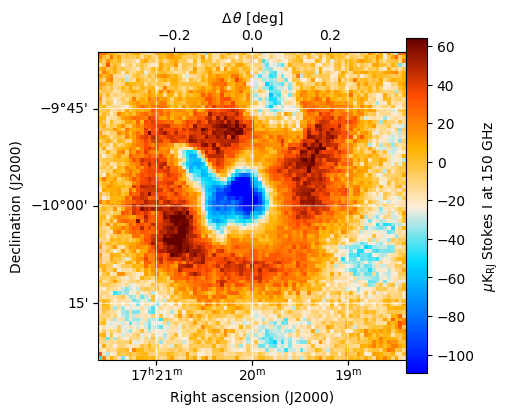

In [9]:
ml_mapper.map.plot(cmap="cmb")

that will improve more as it continues to fit.